# Analyzing Car and House ownership vs Credit Status
---

In [48]:
# Import dependencies

from pathlib import Path
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [49]:
# Read the sample_dataset csv and create a DataFrame
read_file = Path("sample_dataset.csv")
read_file_df = pd.read_csv(read_file)
read_file_df.head()

,Gender,Car,House,Children,Income($),Education,Age,Years Employed,Position,Record Month,Credit Status,Target
0,F,N,Y,Y,135000.0,Secondary / secondary special,35.0,9.8,Sales staff,1.0,<30 days overdue,0
1,F,N,Y,N,180000.0,Secondary / secondary special,54.0,6.6,Private service staff,10.0,Loan paid,0
2,F,Y,Y,Y,225000.0,Higher education,43.0,0.6,Laborers,2.0,Loan paid,0
3,M,Y,Y,N,360000.0,Higher education,48.0,5.8,Drivers,4.0,Loan paid,0
4,F,N,Y,N,202500.0,Secondary / secondary special,34.0,5.6,Laborers,28.0,<30 days overdue,0


In [50]:
# Create a DataFrame with just the Car, House and Credit Status columns

car_house_df = read_file_df[["Car", "House", "Credit Status"]].astype('string')

# Clean up a bit of the data on the Credit Status column
car_house_df = car_house_df.replace([">60 days overdue", "2", "3", "4", "5"], "30+ days overdue")

car_house_df.head()

,Car,House,Credit Status
0,N,Y,<30 days overdue
1,N,Y,Loan paid
2,Y,Y,Loan paid
3,Y,Y,Loan paid
4,N,Y,<30 days overdue


In [51]:
# Create a DataFrame for people who own a car
car_n = car_house_df.loc[(car_house_df["Car"] == "N")]

# Create a DataFrame for people do not own a car
car_y = car_house_df.loc[(car_house_df["Car"] == "Y")]

# Create a DataFrame for people own a house
house_n = car_house_df.loc[(car_house_df["House"] == "N")]

# Create a DataFrame for people do not own a house
house_y = car_house_df.loc[(car_house_df["House"] == "Y")]

In [52]:
# Create Series for each of the DataFrames above with counts of each of the values in the Credit Status column
# These will be used to plot later on 

car_n_plot = car_n["Credit Status"].value_counts()
car_y_plot = car_y["Credit Status"].value_counts()
house_n_plot = house_n["Credit Status"].value_counts()
house_y_plot = house_y["Credit Status"].value_counts()


The DataFrames below are just for extending beyond the basic analysis intended for the presentation
---

In [53]:
# Create separate DataFrame for people who owns both a car and a house
car_y_house_y = car_house_df.loc[(car_house_df["Car"] == "Y") & (car_house_df["House"] == "Y")]

# Create separate DataFrame for people who owns a car but does not own a house
car_y_house_n = car_house_df.loc[(car_house_df["Car"] == "Y") & (car_house_df["House"] == "N")]

# Create separate DataFrame for people who does not own a car but owns a house
car_n_house_y = car_house_df.loc[(car_house_df["Car"] == "N") & (car_house_df["House"] == "Y")]

# Create separate DataFrame for people who does not own a car nor a house
car_n_house_n = car_house_df.loc[(car_house_df["Car"] == "N") & (car_house_df["House"] == "N")]

In [54]:
# Create Series for each of the DataFrames above with counts of each of the values in the Credit Status column
# These will be used to plot later on 
car_y_house_y_plot = car_y_house_y["Credit Status"].value_counts()
car_y_house_n_plot = car_y_house_n["Credit Status"].value_counts()
car_n_house_y_plot = car_n_house_y["Credit Status"].value_counts()
car_n_house_n_plot = car_n_house_n["Credit Status"].value_counts()

---
# Plotting car/house ownership and Credit Status

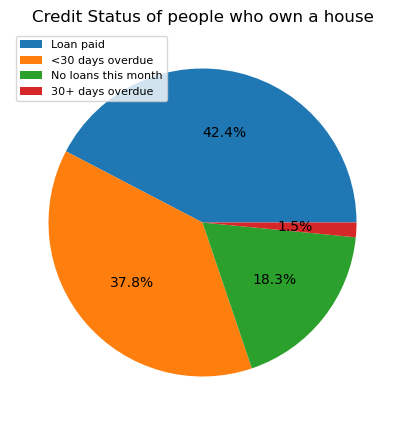

In [55]:
# Create a pie chart of the percentages of the distribution of people owning a house based on their Credit Status

house_y_plot.plot.pie(autopct='%1.1f%%', title="Credit Status of people who own a house", figsize=(5,5), labels=None)

plt.ylabel('')
plt.legend(house_y_plot.index, fontsize=8, loc='best')

# Output into a png image
plt.savefig("output_data/houseowner.png")
plt.show()


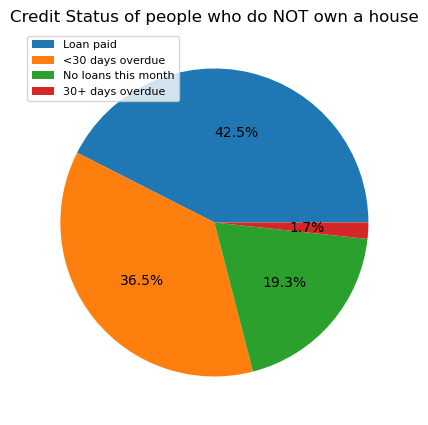

In [56]:
# Create a pie chart of the percentages of the distribution of people not owning a house based on their Credit Status

house_n_plot.plot.pie(autopct='%1.1f%%', title="Credit Status of people who do NOT own a house", figsize=(5,5), labels=None)

plt.ylabel('')
plt.legend(house_n_plot.index, fontsize=8, loc='best')

# Output into a png image
plt.savefig("output_data/not_houseowner.png")
plt.show()



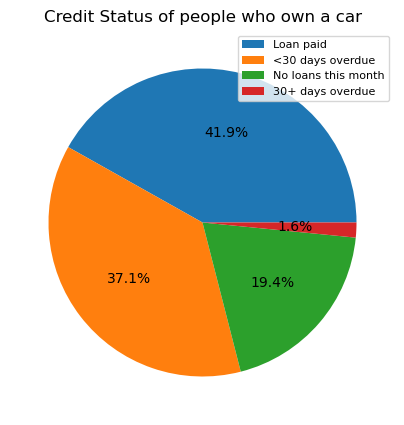

In [57]:
# Create a pie chart of the percentages of the distribution of people owning a car based on their Credit Status

car_y_plot.plot.pie(autopct='%1.1f%%', title="Credit Status of people who own a car", figsize=(5,5), labels=None)

plt.ylabel('')
plt.legend(car_y_plot.index, fontsize=8, loc='best')

# Output into a png image
plt.savefig("output_data/carowner.png")
plt.show()

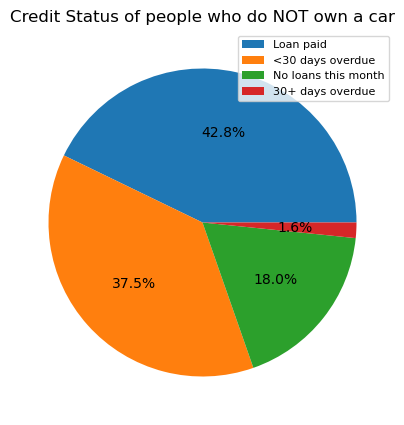

In [58]:
# Create a pie chart of the percentages of the distribution of people not owning a car based on their Credit Status

car_n_plot.plot.pie(autopct='%1.1f%%', title="Credit Status of people who do NOT own a car", figsize=(5,5), labels=None)

plt.ylabel('')
plt.legend(car_n_plot.index, fontsize=8, loc='best')

# Output into a png image
plt.savefig("output_data/not_carowner.png")
plt.show()


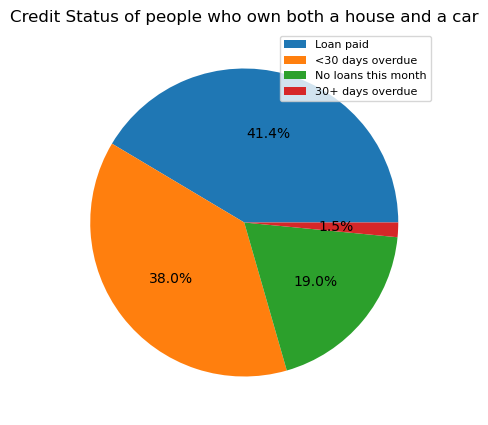

In [59]:
# Create a pie chart of the percentages of the distribution of people owning a house and a car based on their Credit Status

car_y_house_y_plot.plot(kind='pie', autopct='%1.1f%%', title="Credit Status of people who own both a house and a car", figsize=(5,5), labels=None)

plt.ylabel('')
plt.legend(car_y_house_y_plot.index, fontsize=8, loc='best')

# Output into a png image
plt.savefig("output_data/car_home_owner.png")
plt.show()

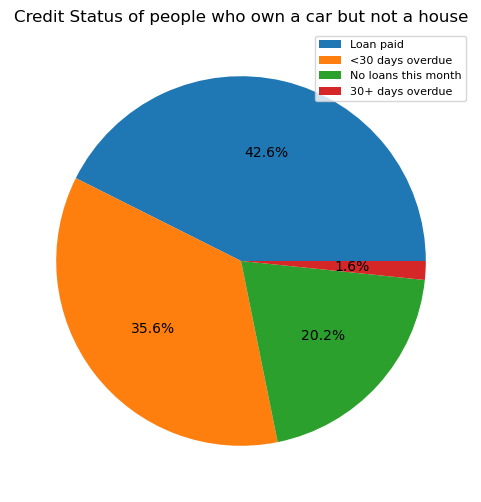

In [60]:
# Create a pie chart of the percentages of the distribution of people owning a car but not a house based on their Credit Status

car_y_house_n_plot.plot(kind='pie', autopct='%1.1f%%', title="Credit Status of people who own a car but not a house", figsize=(6,6), labels=None)

plt.ylabel('')
plt.legend(car_y_house_n_plot.index, fontsize=8, loc='best')

plt.show()

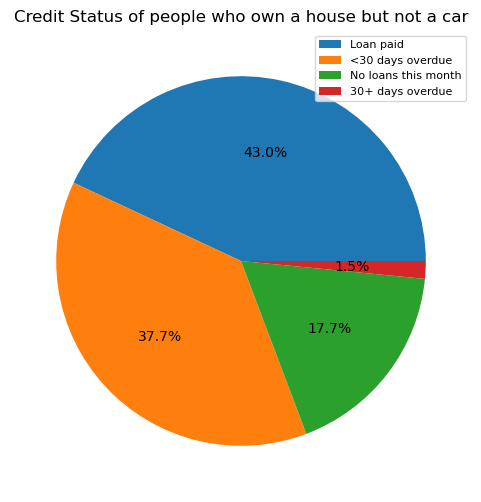

In [61]:
# Create a pie chart of the percentages of the distribution of people owning a house but not a car based on their Credit Status

car_n_house_y_plot.plot(kind='pie', autopct='%1.1f%%', title="Credit Status of people who own a house but not a car", figsize=(6,6), labels=None)

plt.ylabel('')
plt.legend(car_n_house_y_plot.index, fontsize=8, loc='best')

plt.show()

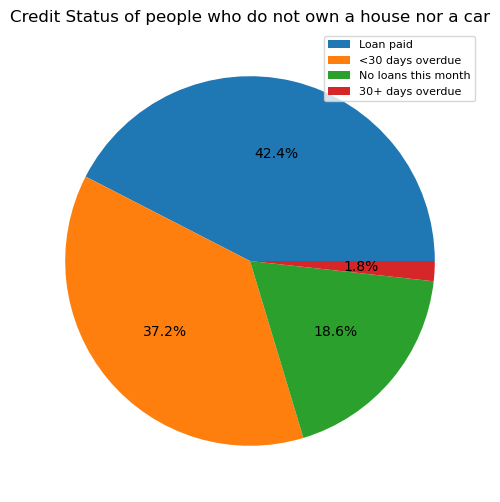

In [62]:
# Create a pie chart of the percentages of the distribution of people not owning a house and a car based on their Credit Status

car_n_house_n_plot.plot(kind='pie', autopct='%1.1f%%', title="Credit Status of people who do not own a house nor a car", figsize=(6,6), labels=None)

plt.ylabel('')
plt.legend(car_n_house_n_plot.index, fontsize=8, loc='best')

# Output into a png image
plt.savefig("output_data/not_car_home_owner.png")
plt.show()

#### Create Dataframes for percentages of each category (No loans this month, Loan Paid, < 30 days overdue and 30+ days overdue)
---

In [63]:
# Create percentage DataFrame for people owning cars vs Credit Status

total = car_y_plot.values.sum()
total

car_y_data = car_y_plot.to_frame()
car_y_data["Credit Status(Percent)"] = car_y_data["Credit Status"]/total

car_y_data

,Credit Status,Credit Status(Percent)
Loan paid,8975,0.418591
<30 days overdue,7963,0.371391
No loans this month,4167,0.194347
30+ days overdue,336,0.015671


In [64]:
# Create percentage DataFrame for people not owning cars vs Credit Status

total = car_n_plot.values.sum()
total

car_n_data = car_n_plot.to_frame()
car_n_data["Credit Status(Percent)"] = car_n_data["Credit Status"]/total

car_n_data

,Credit Status,Credit Status(Percent)
Loan paid,12231,0.428271
<30 days overdue,10719,0.375328
No loans this month,5147,0.180223
30+ days overdue,462,0.016177


In [65]:
# Create percentage DataFrame for people owning houses vs Credit Status

total = house_y_plot.values.sum()

house_y_data = house_y_plot.to_frame()
house_y_data["Credit Status(Percent)"] = house_y_data["Credit Status"]/total

house_y_data

,Credit Status,Credit Status(Percent)
Loan paid,13573,0.423547
<30 days overdue,12126,0.378394
No loans this month,5855,0.182706
30+ days overdue,492,0.015353


In [66]:
# Create percentage DataFrame for people not owning houses vs Credit Status

total = house_n_plot.values.sum()

house_n_data = house_n_plot.to_frame()
house_n_data["Credit Status(Percent)"] = house_n_data["Credit Status"]/total

house_n_data

,Credit Status,Credit Status(Percent)
Loan paid,7633,0.425142
<30 days overdue,6556,0.365155
No loans this month,3459,0.192659
30+ days overdue,306,0.017044


In [67]:
# Create percentage DataFrame for people not owning houses vs Credit Status

total = car_y_house_y_plot.values.sum()

car_y_house_y_data = car_y_house_y_plot.to_frame()
car_y_house_y_data["Credit Status(Percent)"] = car_y_house_y_data["Credit Status"]/total

car_y_house_y_data

,Credit Status,Credit Status(Percent)
Loan paid,5699,0.414443
<30 days overdue,5227,0.380118
No loans this month,2615,0.190168
30+ days overdue,210,0.015272


In [68]:
# Create percentage DataFrame for people not owning houses vs Credit Status

total = car_n_house_n_plot.values.sum()

car_n_house_n_data = car_n_house_n_plot.to_frame()
car_n_house_n_data["Credit Status(Percent)"] = car_n_house_n_data["Credit Status"]/total

car_n_house_n_data

,Credit Status,Credit Status(Percent)
Loan paid,4357,0.424493
<30 days overdue,3820,0.372175
No loans this month,1907,0.185795
30+ days overdue,180,0.017537


# Statistical Analysis
---

I did a Chi-squared test on the percentages of car owners and non-car owners, and also with homeowners and non-homeowners

The null hypothesis is that there is no relation between the credit status of car/home owners and non car/house owners

In [69]:
# Chi-Squared test for people who own and do not own the house
critical_value = stats.chi2.ppf(q = 0.95, df = 3)
chi_2 = stats.chisquare(house_n_data["Credit Status(Percent)"], house_y_data["Credit Status(Percent)"])

reject_h0 = (critical_value <= chi_2[0])

# Print critical value, Chi-square statistic and p-value of the test and if we reject null hypothesis
print(f"Critical Value = {critical_value}")
print(f"Chi-Square statistic = {chi_2[0]}")
print(f"p-value = {chi_2[1]}")
reject_h0

Critical Value = 7.814727903251179
Chi-Square statistic = 0.0011974945974129367
p-value = 0.9999889827517199


False

In [70]:
# Chi-Squared test for people who own and do not own the car

chi_2 = stats.chisquare(car_n_data["Credit Status(Percent)"], car_y_data["Credit Status(Percent)"])

reject_h0 = (critical_value <= chi_2[0])

# Print critical value, Chi-square statistic and p-value of the test and if we reject null hypothesis
print(f"Critical Value = {critical_value}")
print(f"Chi-Square statistic = {chi_2[0]}")
print(f"p-value = {chi_2[1]}")
reject_h0

Critical Value = 7.814727903251179
Chi-Square statistic = 0.001308398980410546
p-value = 0.9999874177404541


False

In [71]:
# Chi-Squared test for people who own and do not own both a car and a house

chi_2 = stats.chisquare(car_y_house_y_data["Credit Status(Percent)"], car_n_house_n_data["Credit Status(Percent)"])

reject_h0 = (critical_value <= chi_2[0])

# Print critical value, Chi-square statistic and p-value of the test and if we reject null hypothesis
print(f"Critical Value = {critical_value}")
print(f"Chi-Square statistic = {chi_2[0]}")
print(f"p-value = {chi_2[1]}")
reject_h0

Critical Value = 7.814727903251179
Chi-Square statistic = 0.0008030703842415297
p-value = 0.9999939487569928


False

---
#### We see in the results that we do not reject the null hypothesis. The p-value for the tests above were both 1 meaning the null hypothesis is the correct assumption. So, we can assume that there is no between the credit status of car/home owners and non car/house owners
---